In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
 # Data 불러오기

import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')

df = df.dropna().reset_index()

df = df.drop(df.columns[0:2], axis = 1)

df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01


In [ ]:
# Sales 단위 맞춰주기. 기본단위를 M(Million)으로 추정, K을 포함하는 Feature 추출

contains_K_NA = df['NA_Sales'].str.contains('K', case=False)
contains_K_EU = df['EU_Sales'].str.contains('K', case=False)
contains_K_JP = df['JP_Sales'].str.contains('K', case=False)
contains_K_Ot = df['Other_Sales'].str.contains('K', case=False)

contains = pd.concat([contains_K_NA, contains_K_EU, contains_K_JP, contains_K_Ot], axis = 1)

contains.head(15)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [ ]:
# toFloat, toInt 함수 생성

def toFloat(str):
  return float(str)

def toInt(str):
  return int(str)

In [ ]:
# 단위 맞춰주기

sales = df.loc[:, 'NA_Sales' : 'Other_Sales']

sales = sales.replace({'M': '', 'K':''}, regex=True).applymap(toFloat)

for country in contains.columns:
  for idx in range(len(contains)):
    if contains[country][idx] == True:
      sales[country][idx] = sales[country][idx] * 0.001

sales.head(15)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
5,0.00,0.00,0.14,0.00
6,0.02,0.01,0.00,0.00
7,0.07,0.00,0.11,0.01
8,0.00,0.00,0.04,0.00
9,0.04,0.03,0.00,0.01


In [ ]:
# 원본 DataFrame에 씌워주기

df.loc[:, 'NA_Sales' : 'Other_Sales'] = sales

df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01


In [ ]:
# 전체 Sales 합 계산 및 연도 type 변경

df['Sum_of_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df['Year'] = df['Year'].apply(toInt)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_of_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16239,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01,0.2
16240,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0,0.01
16241,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16242,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
# 연도 데이터의 Outlier 처리해주기

year_condition = df['Year'] < 100

df[year_condition]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_of_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03,0.16
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01,0.18
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01,0.1
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0,0.02
758,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14,1.08
...,...,...,...,...,...,...,...,...,...,...
15642,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0,0.02
15757,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0,0.01
15802,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05,0.5
16042,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0,0.02


In [ ]:
for idx in range(len(year_condition)):
  if year_condition[idx] == True:
    if df['Year'][idx] < 50:
      df['Year'][idx] = df['Year'][idx] + 2000
    elif df['Year'][idx] >= 50:
      df['Year'][idx] = df['Year'][idx] + 1900

df[year_condition]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_of_Sales
72,Age of Empires III: Complete Collection,PC,2009,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03,0.16
79,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01,0.18
210,NASCAR Unleashed,PS3,2011,Racing,Activision,0.09,0,0,0.01,0.1
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015,Action,Little Orbit,0,0.02,0,0,0.02
758,NASCAR Thunder 2004,PS2,2003,Racing,Electronic Arts,0.53,0.41,0,0.14,1.08
...,...,...,...,...,...,...,...,...,...,...
15642,Sugoi Hebereke,SNES,1994,Fighting,Sunsoft,0,0,0.02,0,0.02
15757,Fab 5 Soccer,DS,2008,Sports,Destineer,0.01,0,0,0,0.01
15802,Dragon Ball Z: Burst Limit,X360,2008,Fighting,Atari,0.24,0.18,0.03,0.05,0.5
16042,Point Blank 3,PS,2000,Shooter,Namco Bandai Games,0.01,0.01,0,0,0.02


##1. 지역에 따라서 선호하는 게임 장르가 다를까 ?
##2. 연도별 게임의 트렌드가 있을까 ?
##3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
# 첫번째 필수 질문
# 지역에 따라서 선호하는 게임 장르가 다를까 ?

# 각 지역 판매량과 게임 장르 사이의 관계 파악
# 가설 검증 Chi-Square Test
# 시각화

In [ ]:
# 첫번째 질문을 위한 df Slicing

df_test_1 = df.loc[:, 'Genre' : 'Other_Sales']

df_test_1 = df_test_1.drop('Publisher', axis=1)

df_test_1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0,0,0
1,Action,0.17,0,0,0.01
2,Adventure,0,0,0.02,0
3,Misc,0.04,0,0,0
4,Platform,0.12,0.09,0,0.04
...,...,...,...,...,...
16239,Platform,0.15,0.04,0,0.01
16240,Action,0.01,0,0,0
16241,Sports,0.44,0.19,0.03,0.13
16242,Action,0.05,0.05,0.25,0.03


In [ ]:
# 지역별 Genre의 누적 판매량 합계

problem_1 = df_test_1.groupby(['Genre']).sum().T

problem_1

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,356.44,323.93,574.48,181.43,667.26,67.83
EU_Sales,513.64,63.66,99.90,208.15,200.63,50.47,235.98,187.14,310.23,113.02,370.97,44.82
JP_Sales,156.60,51.75,87.14,104.18,130.53,56.24,56.32,347.27,38.18,63.54,134.76,49.10
Other_Sales,183.99,16.70,36.15,72.64,51.45,12.44,76.65,57.52,101.86,31.33,132.35,11.23


In [ ]:
# Chi-Square 를 통한 동질성 검사

from scipy.stats import chi2_contingency

chi2, p, dof, exp = chi2_contingency(problem_1)

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'

print(exp)
print('\n')
print(msg.format(chi2, p, dof))

# Chi-Square 동질성 Test.

# 귀무가설 : 각 지역별 게임 장르 선호도는 차이가 없다.
# 대안가설 : 각 지역별 게임 장르 선호도는 차이가 있다.

# p-value: 4.359966640564866e-123 <<<< 0.05 : 귀무가설 기각
# 따라서 각 지역별 게임 장르 선호도는 차이가 있다.

[[842.37411439 115.02253696 218.11498949 383.4248485  407.17191267
  118.38125405 356.7173924  450.38281615 503.9305034  191.45179174
  641.9132894   85.06455085]
 [468.37051299  63.95396501 121.27465431 213.18899752 226.39266136
   65.8214536  198.33931886 250.41846258 280.1916445  106.44958383
  356.91179432  47.29695112]
 [249.08514101  34.0114972   64.49533762 113.37650436 120.39837354
   35.00465037 105.47926446 133.17558713 149.00932775  56.61118466
  189.81003746  25.15309443]
 [153.15023161  20.91200083  39.65501858  69.70964961  74.02705243
   21.52264198  64.85402428  81.88313414  91.61852435  34.80743977
  116.70487883  15.4654036 ]]


Test Statistic: 685.9972108460213
p-value: 4.359966640564866e-123
Degree of Freedom: 33


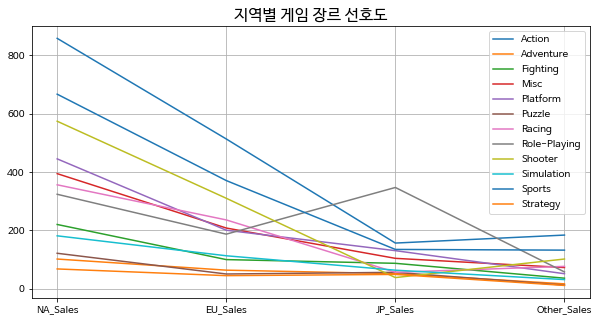

In [ ]:
# 지역별 게임 장르 선호도가 다르다
# 시각화

labels_1 = []
for column in problem_1.columns:
  labels_1.append(column)

plt.figure(figsize=(10,5));
plt.plot(problem_1.loc[:, 'Action' : 'Strategy']);
plt.title('지역별 게임 장르 선호도', fontsize=16)
plt.legend((labels_1));
plt.grid()

## 북미, 유럽, 타지역에서는 Action과 Sports 장르의 게임이 선호되지만, 일본지역에서는 Role-Playing 게임이 가장 선호된다.
## 게다가 다른 세 지역에서는 Shooter 장르의 게임이 세번째로 선호되는 반면, 일본지역에서는 가장 선호되지 않는다.

In [ ]:
# 두번째 필수 질문
# 연도별 게임의 트렌드가 있을까 ?

# 1. 출시연도에 따른 장르 트렌드
# 2. 연도별 최고 판매 장르

In [ ]:
# 연도 Binning

import numpy as np

bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

df_test_2 = df.loc[:, 'Year' : 'Other_Sales']
df_test_2 = df_test_2.drop('Publisher', axis =1 )

df_test_2['Year_bin'] = np.digitize(df.Year, bins)

for idx in range(len(df_test_2.Year_bin)):
  if df_test_2.Year_bin[idx] == 1:
    df_test_2.Year_bin[idx] = 1950
  elif df_test_2.Year_bin[idx] == 2:
    df_test_2.Year_bin[idx] = 1960
  elif df_test_2.Year_bin[idx] == 3:
    df_test_2.Year_bin[idx] = 1970
  elif df_test_2.Year_bin[idx] == 4:
    df_test_2.Year_bin[idx] = 1980
  elif df_test_2.Year_bin[idx] == 5:
    df_test_2.Year_bin[idx] = 1990
  elif df_test_2.Year_bin[idx] == 6:
    df_test_2.Year_bin[idx] = 2000
  elif df_test_2.Year_bin[idx] == 7:
    df_test_2.Year_bin[idx] = 2010
  elif df_test_2.Year_bin[idx] == 8:
    df_test_2.Year_bin[idx] = 2020

df_test_2.head(25)

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_bin
0,2008,Action,0.04,0,0,0,2000
1,2009,Action,0.17,0,0,0.01,2000
2,2010,Adventure,0,0,0.02,0,2010
3,2010,Misc,0.04,0,0,0,2010
4,2010,Platform,0.12,0.09,0,0.04,2010
5,2005,Sports,0,0,0.14,0,2000
6,2011,Simulation,0.02,0.01,0,0,2010
7,2005,Action,0.07,0,0.11,0.01,2000
8,2007,Adventure,0,0,0.04,0,2000
9,2011,Action,0.04,0.03,0,0.01,2010


In [ ]:
# 연도별 장르 출시 선호도를 알아보기 위한 Cross Tabulation
# Chi-Square를 이용한 동질성 검사

ctab = pd.crosstab(df_test_2['Year_bin'], df['Genre'])
ctab.reset_index(inplace=True)

chi2, p, dof, exp = chi2_contingency(ctab)

print(exp)
print('\n')
print(msg.format(chi2, p, dof))

# Chi-Square 동질성 Test.

# 귀무가설 : 각 연도별 게임 장르 출시 선호도는 차이가 없다.
# 대안가설 : 각 연도별 게임 장르 출시 선호도는 차이가 있다.

# p-value: 4.359966640564866e-123 <<<< 0.05 : 귀무가설 기각
# 따라서 각 연도별 게임 장르 출시 선호도는 차이가 있다. 

[[ 832.19021491  269.62962963  105.35528121   69.48788294  139.89117513
    72.65020576   47.10196616  101.69364426  121.99908551  106.52034751
    70.4865112   191.32053041   55.67352538]
 [1430.80323121  463.58024691  181.13968907  119.47206981  240.51802317
   124.90912209   80.98346289  174.84415485  209.7557537   183.1428136
   121.18903368  328.94166286   95.72073617]
 [4250.11431184 1377.03703704  538.06447188  354.88454504  714.44421582
   371.03497942  240.55647005  519.36396891  623.06675812  544.01463192
   359.98468221  977.10128029  284.33264746]
 [2716.81146167  880.24691358  343.94833105  226.85375705  456.69600671
   237.1776406   153.77152873  331.99436062  398.28456028  347.75186709
   230.1139308   624.59495504  181.75468679]
 [ 770.08078037  249.50617284   97.49222679   64.30174516  129.45057918
    67.22805213   43.58657217   94.10387136  112.8938424    98.57033989
    65.2258421   177.04157141   51.51840421]]


Test Statistic: 9355.96643582184
p-value: 0.0
Degree 

In [ ]:
ctab

Genre,Year_bin,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,66,2,4,8,33,19,8,9,30,3,22,0
1,1990,161,97,193,115,125,71,182,171,137,86,304,123
2,2000,1579,630,442,997,565,361,799,729,718,551,1404,379
3,2010,1434,537,196,561,150,115,233,557,395,206,569,167
4,2020,0,0,0,0,0,0,0,0,0,1,0,0


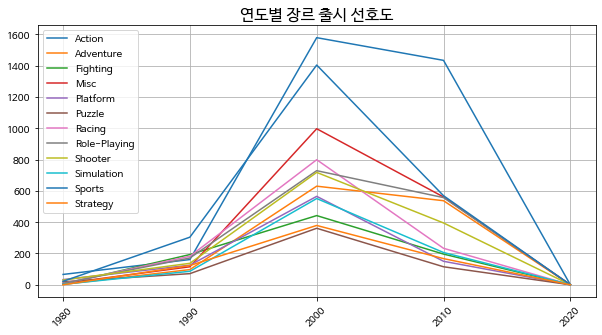

In [ ]:
# 연도별 장르 출시 선호도 시각화

labels_2 = []
for column in ctab.columns[1:]:
  labels_2.append(column)

plt.figure(figsize=(10,5));
plt.plot(ctab.iloc[:, 1:]);
plt.title('연도별 장르 출시 선호도', fontsize=16)
plt.xticks(range(len(ctab.Year_bin)), labels=ctab.Year_bin, rotation=45)
plt.legend((labels_2));
plt.grid()

## 2002년 이전에는 Sports 장르가, 이후에는 Action 장르의 게임이 많이 출시되었다.

In [ ]:
df_test_2[df_test_2['Year_bin'] == 2020]  # 가장 최근 집계연도는 2020년

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_bin
6767,2020,Simulation,0.27,0,0,0.02,2020


In [ ]:
# 연도별 장르 소비 선호도
# Limitation : Sales Feature를 누적 판매량으로 추정했을 때, 각 연도별 얼마나 판매가 되었는지 정확히 알 수 없음.
#             편하게 동등한 비율로 나눠서 계산.

df_test_2_1 = pd.concat([df_test_2.Genre, df_test_2.Year_bin, df.Sum_of_Sales], axis = 1)

df_test_2_1['Stacked_Years'] = 2021 - df_test_2.Year

df_test_2_1['Sales_Per_Year'] = df_test_2_1.Sum_of_Sales / df_test_2_1.Stacked_Years

grouped = df_test_2_1['Sales_Per_Year'].groupby([df_test_2['Year'], df_test_2_1['Genre']])

sum = grouped.sum()

problem_2 = sum.unstack().fillna(0)

problem_2.reset_index(inplace=True)

for column in problem_2.columns[1 : ]:
  problem_2[column] = problem_2[column] / df_test_2_1['Stacked_Years']

for column in problem_2.columns[1 : ]:
  for idx in range(len(problem_2)):
    if idx < len(problem_2) - 1:
      problem_2[column][idx+1] += problem_2[column][idx]
    elif idx == len(problem_2) - 1:
      continue

problem_2

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,0.000638,0.000000,0.001445,0.005066,0.000000,0.000000,0.000000,0.000000,0.013265,0.000000,0.000000,0.000000
1,1981,0.031450,0.000000,0.001445,0.005066,0.014417,0.004688,0.001000,0.000000,0.034140,0.000917,0.001625,0.000000
2,1982,0.046602,0.000000,0.001445,0.007094,0.026142,0.028091,0.004660,0.000000,0.043021,0.000917,0.004096,0.000000
3,1983,0.053444,0.000957,0.001445,0.012213,0.042721,0.029957,0.004660,0.000000,0.044193,0.000917,0.011751,0.000000
4,1984,0.057989,0.000957,0.001445,0.015776,0.044416,0.037672,0.019279,0.000000,0.120606,0.000917,0.026911,0.000000
5,1985,0.064101,0.000957,0.003268,0.015776,0.119364,0.043245,0.019279,0.000000,0.122342,0.000986,0.030314,0.000000
6,1986,0.103358,0.000957,0.003268,0.015776,0.146192,0.043245,0.024879,0.007200,0.133456,0.000986,0.046257,0.000000
7,1987,0.105398,0.009008,0.013231,0.015776,0.149391,0.043245,0.024879,0.015748,0.134724,0.000986,0.053077,0.000000
8,1988,0.109164,0.009008,0.013231,0.015776,0.209413,0.055323,0.029511,0.028475,0.135828,0.001051,0.060869,0.000000
9,1989,0.123696,0.009008,0.013231,0.019776,0.273975,0.173291,0.029511,0.035350,0.139547,0.001051,0.078744,0.000000


In [ ]:
# 비율로 계산하기 위해 각 연도별 판매량의 합으로 나눔.

problem_2['Sum'] = (problem_2['Action'] + problem_2['Adventure'] + problem_2['Fighting'] + problem_2['Misc'] + problem_2['Platform']
                    + problem_2['Puzzle'] + problem_2['Racing'] + problem_2['Role-Playing'] + problem_2['Shooter'] + problem_2['Simulation']
                    + problem_2['Sports'] + problem_2['Strategy'])

for column in problem_2.columns[1 : ]:
  problem_2[column] = problem_2[column] / problem_2['Sum']

problem_2

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Sum
0,1980,0.031250,0.000000,0.070772,0.248162,0.000000,0.000000,0.000000,0.000000,0.649816,0.000000,0.000000,0.000000,1.0
1,1981,0.331944,0.000000,0.015248,0.053466,0.152161,0.049474,0.010555,0.000000,0.360327,0.009675,0.017151,0.000000,1.0
2,1982,0.287550,0.000000,0.008914,0.043770,0.161303,0.173330,0.028752,0.000000,0.265452,0.005656,0.025273,0.000000,1.0
3,1983,0.264238,0.004731,0.007143,0.060385,0.211219,0.148113,0.023038,0.000000,0.218499,0.004532,0.058101,0.000000,1.0
4,1984,0.177900,0.002936,0.004432,0.048397,0.136259,0.115569,0.059144,0.000000,0.369994,0.002812,0.082558,0.000000,1.0
5,1985,0.152755,0.002280,0.007787,0.037595,0.284450,0.103054,0.045942,0.000000,0.291547,0.002350,0.072239,0.000000,1.0
6,1986,0.196657,0.001821,0.006217,0.030017,0.278158,0.082281,0.047337,0.013699,0.253925,0.001876,0.088012,0.000000,1.0
7,1987,0.186393,0.015931,0.023398,0.027899,0.264192,0.076477,0.043997,0.027849,0.238255,0.001744,0.093864,0.000000,1.0
8,1988,0.163506,0.013493,0.019817,0.023629,0.313657,0.082862,0.044201,0.042650,0.203443,0.001574,0.091169,0.000000,1.0
9,1989,0.137872,0.010041,0.014747,0.022042,0.305374,0.193151,0.032893,0.039401,0.155540,0.001171,0.087768,0.000000,1.0


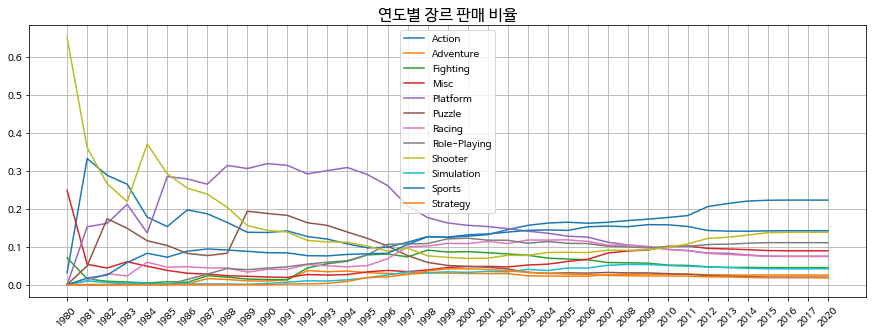

In [ ]:
# 연도별 장르 판매량 시각화

import matplotlib.pyplot as plt  # 연도별 Pie Plot

labels_3 = []
for column in problem_2.columns:
  labels_3.append(column)

plt.figure(figsize=(15,5));
plt.plot(problem_2.loc[:, 'Action' : 'Strategy']);
plt.title('연도별 장르 판매 비율', fontsize=16)
plt.xticks(range(len(problem_2.Year)), labels=problem_2.Year, rotation=45)
plt.legend((labels_3[1 : ]));
plt.grid()

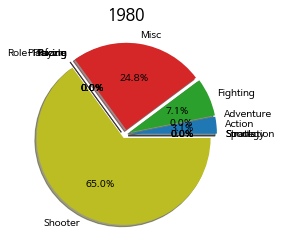

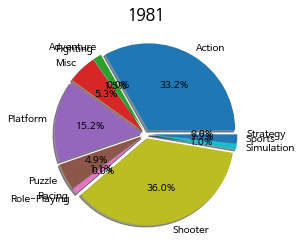

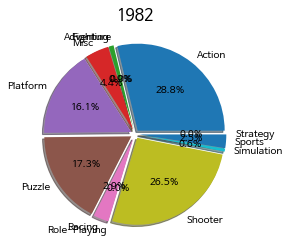

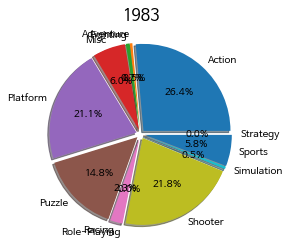

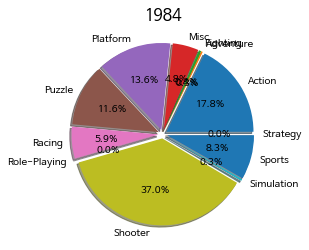

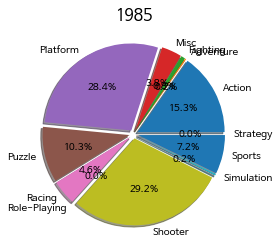

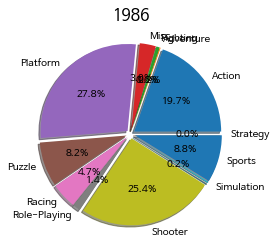

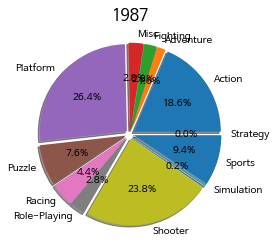

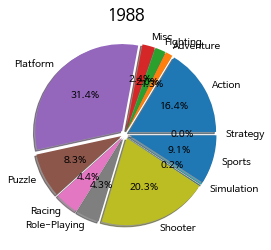

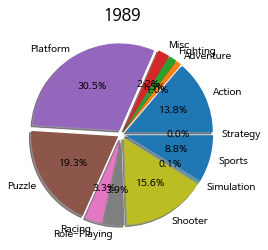

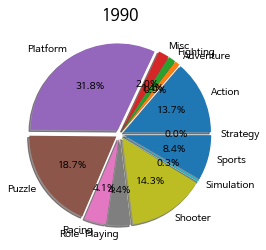

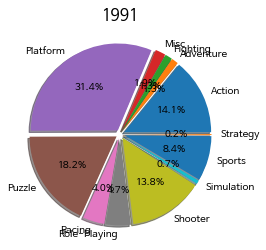

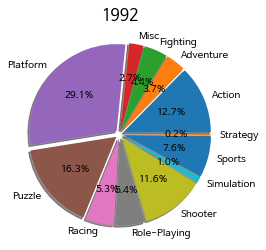

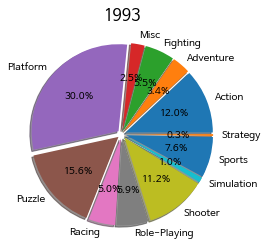

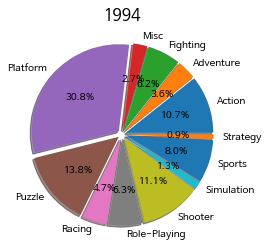

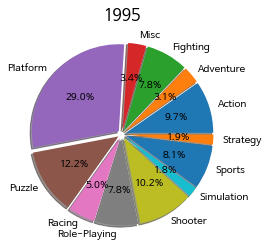

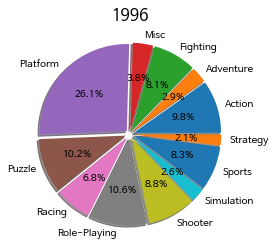

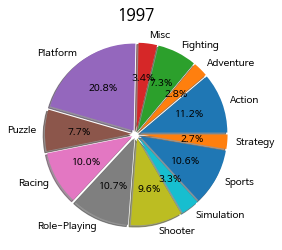

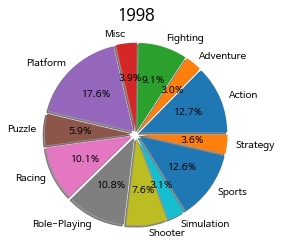

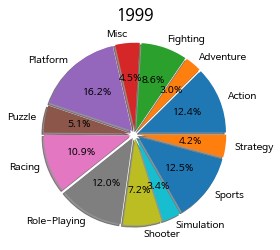

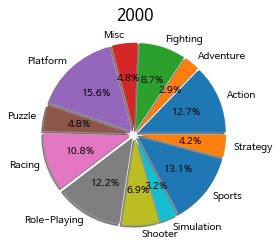

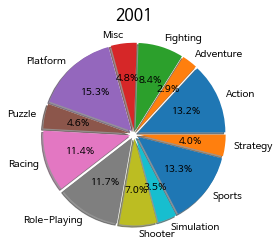

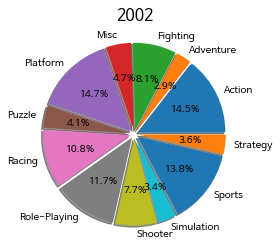

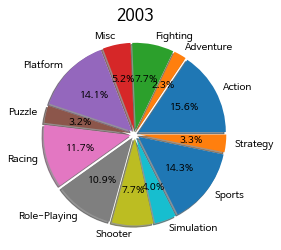

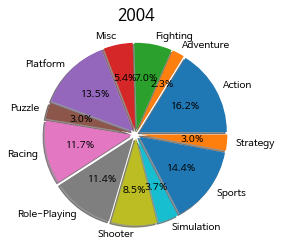

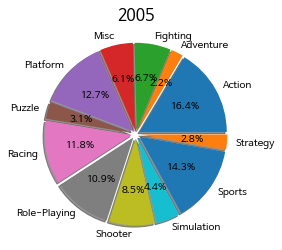

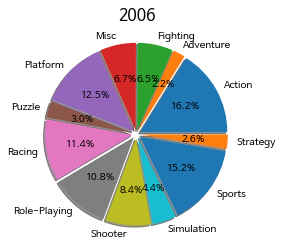

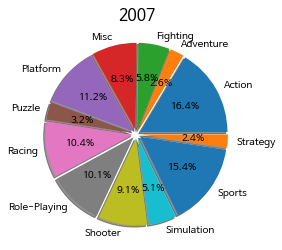

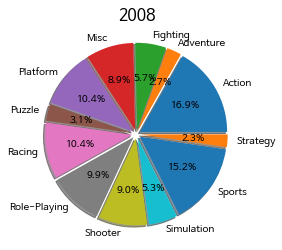

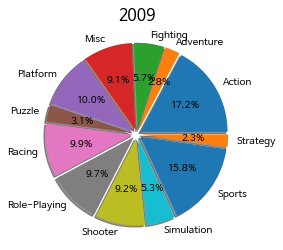

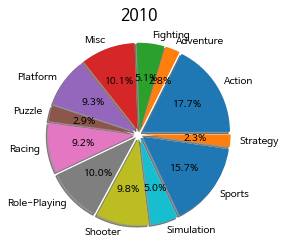

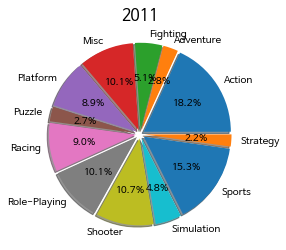

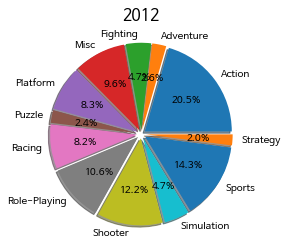

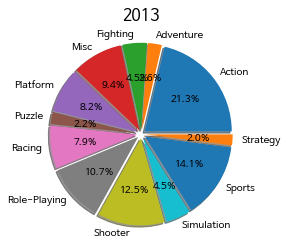

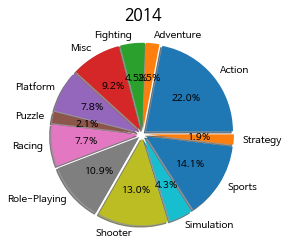

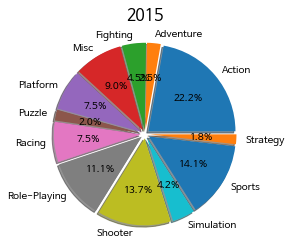

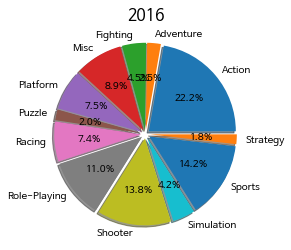

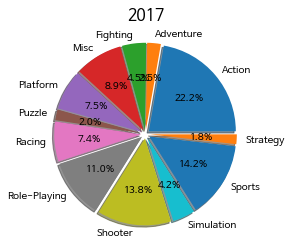

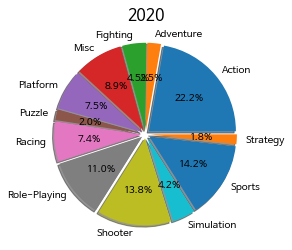

In [ ]:
# pie plot으로 시각화

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

for idx in range(len(problem_2)):
  ratio = problem_2.iloc[idx, 1:-1]
  
  plt.pie(ratio, labels=labels_3[1:-1], autopct='%.1f%%', explode=explode, shadow=True)
  plt.title(problem_2.Year[idx], fontsize=16)
  plt.show()

## 2000 년도 이후로 Action, Sports, Shooter 순으로 소비.

In [ ]:
# 세번째 필수 질문
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# 가장 출고량이 높은 게임 100개 추출.
# 각 게임별 장르 확인. 플랫폼 확인.

In [ ]:
# 가장 출고량이 높은 게임 100개 추출.

df_test_3 = pd.concat([df['Name'], df['Year'], df['Genre'], df['Platform'], df['Sum_of_Sales']], axis=1)
df_test_3 = df_test_3.sort_values(by=['Sum_of_Sales'], ascending=False)
df_test_3 = df_test_3.reset_index(drop=True)

df_test_4 = df_test_3

df_test_3 = df_test_3.head(1000)

df_test_3

,Name,Year,Genre,Platform,Sum_of_Sales
0,Wii Sports,2006,Sports,Wii,82.74
1,Super Mario Bros.,1985,Platform,NES,40.24
2,Mario Kart Wii,2008,Racing,Wii,35.83
3,Wii Sports Resort,2009,Sports,Wii,33
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,GB,31.38
...,...,...,...,...,...
995,Cooking Mama 3: Shop & Chop,2009,Simulation,DS,1.75
996,Yoshi,1991,Puzzle,NES,1.75
997,State of Emergency,2002,Action,PS2,1.75
998,Crackdown,2007,Shooter,X360,1.75


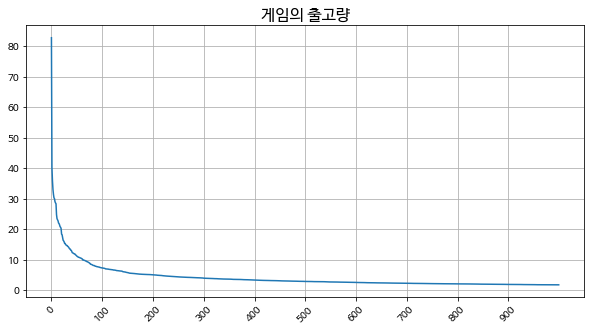

In [ ]:
# 표본 개수 추출을 위한 시각화

plt.figure(figsize=(10,5));
plt.plot(df_test_3.index,df_test_3['Sum_of_Sales']);
plt.title("게임의 출고량", fontsize=16);
plt.xticks(range(0, 1000, 100), rotation=45);
plt.grid()

## 게임의 출고량 내림차순으로 살펴본 결과, 표본의 개수를 상위 100개로 선택.

In [ ]:
# 표본 100개 추출

df_test_3 = df_test_3.head(100)

df_test_3

,Name,Year,Genre,Platform,Sum_of_Sales
0,Wii Sports,2006,Sports,Wii,82.74
1,Super Mario Bros.,1985,Platform,NES,40.24
2,Mario Kart Wii,2008,Racing,Wii,35.83
3,Wii Sports Resort,2009,Sports,Wii,33
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,GB,31.38
...,...,...,...,...,...
95,Super Mario Bros. 2,1988,Platform,NES,7.46
96,Super Smash Bros. for Wii U and 3DS,2014,Fighting,3DS,7.44
97,Call of Duty: World at War,2008,Shooter,X360,7.38
98,Battlefield 3,2011,Shooter,X360,7.34


In [ ]:
# 가장 많이 팔린 게임들의 장르별 Groupby

df_test_3_genre = df_test_3.groupby(df_test_3['Genre']).size().sort_values(ascending=False)
df_test_3_platform = df_test_3.groupby(df_test_3['Platform']).size().sort_values(ascending=False)

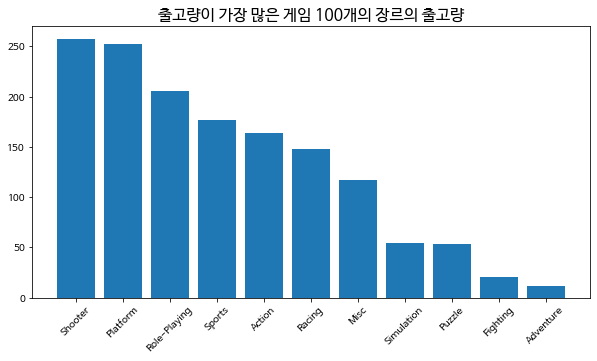

In [ ]:
sum_2 = df_test_3['Sum_of_Sales'].groupby(df_test_3['Genre']).sum().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(sum_2.index,sum_2);
plt.title("출고량이 가장 많은 게임 100개의 장르의 출고량", fontsize=16);
plt.xticks(rotation=45);

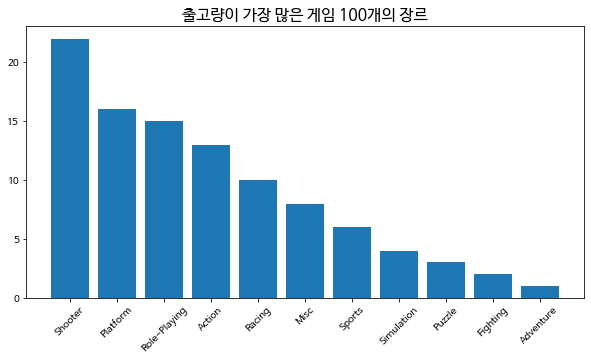

In [ ]:
# 시각화

plt.figure(figsize=(10,5));
plt.bar(df_test_3_genre.index,df_test_3_genre);
plt.title("출고량이 가장 많은 게임 100개의 장르", fontsize=16);
plt.xticks(rotation=45);

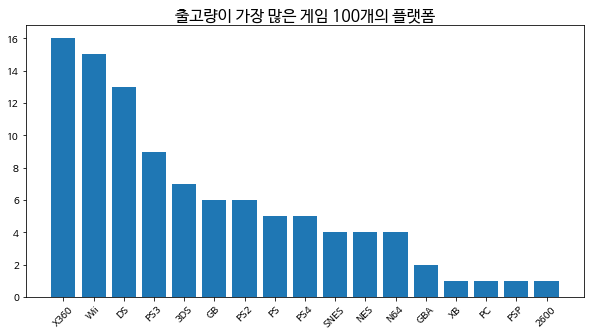

In [ ]:
# 시각화

plt.figure(figsize=(10,5));
plt.bar(df_test_3_platform.index,df_test_3_platform);
plt.title("출고량이 가장 많은 게임 100개의 플랫폼", fontsize=16)
plt.xticks(rotation=45);

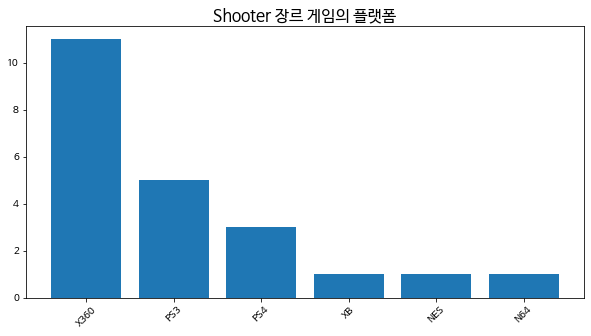

In [ ]:
# 시각화

genre_condition = df_test_3['Genre'] == 'Shooter'

df_test_3_genre_action = df_test_3[genre_condition]
df_test_3_genre_action_platform = df_test_3_genre_action.groupby(df_test_3_genre_action['Platform']).size().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(df_test_3_genre_action_platform.index,df_test_3_genre_action_platform);
plt.title("Shooter 장르 게임의 플랫폼", fontsize=16)
plt.xticks(rotation=45);

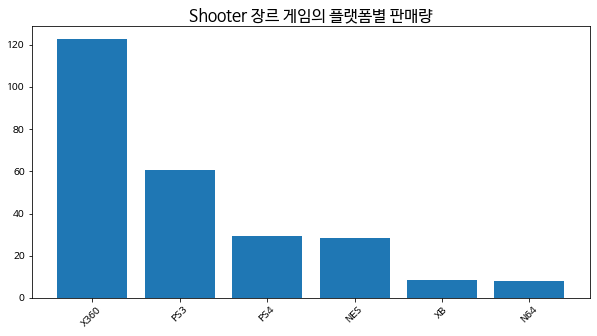

In [ ]:
# 시각화

genre_condition = df_test_3['Genre'] == 'Shooter'

df_test_3_genre_action = df_test_3[genre_condition]
df_test_3_genre_action_platform = df_test_3_genre_action['Sum_of_Sales'].groupby(df_test_3_genre_action['Platform']).sum().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(df_test_3_genre_action_platform.index,df_test_3_genre_action_platform);
plt.title("Shooter 장르 게임의 플랫폼별 판매량", fontsize=16)
plt.xticks(rotation=45);

## 가장 많이 팔린 게임 100개 중 가장 많은 비율을 차지하는 게임 장르는 Shopter 게임이었고, 그 중 가장 많이 차지하는 플랫폼은 X360 이다.

In [ ]:
year_condition_2 = df_test_4['Year'] > 2000

df_test_4_year = df_test_4[year_condition_2].head(100)

df_test_4_year

,Name,Year,Genre,Platform,Sum_of_Sales
0,Wii Sports,2006,Sports,Wii,82.74
2,Mario Kart Wii,2008,Racing,Wii,35.83
3,Wii Sports Resort,2009,Sports,Wii,33
6,New Super Mario Bros.,2006,Platform,DS,30.01
7,Wii Play,2006,Misc,Wii,29.01
...,...,...,...,...,...
122,Red Dead Redemption,2010,Action,PS3,6.6
123,FIFA 15,2014,Sports,PS4,6.6
124,Donkey Kong Country Returns,2010,Platform,Wii,6.59
125,The Elder Scrolls V: Skyrim,2011,Role-Playing,PS3,6.56


In [ ]:
df_test_4_year_genre = df_test_4_year.groupby(df_test_4_year['Genre']).size().sort_values(ascending=False)
df_test_4_year_platform = df_test_4_year.groupby(df_test_4_year['Platform']).size().sort_values(ascending=False)

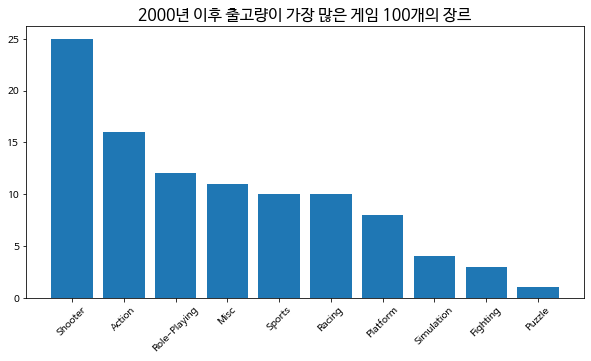

In [ ]:
# 시각화

plt.figure(figsize=(10,5));
plt.bar(df_test_4_year_genre.index,df_test_4_year_genre);
plt.title("2000년 이후 출고량이 가장 많은 게임 100개의 장르", fontsize=16);
plt.xticks(rotation=45);

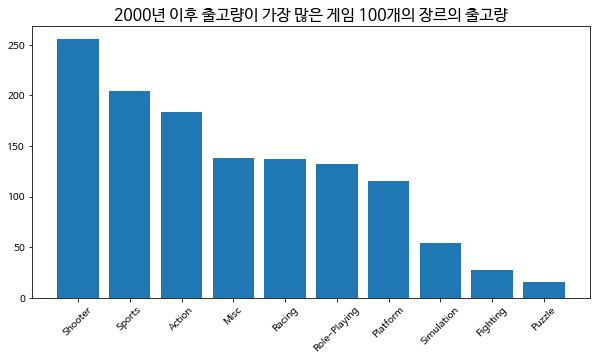

In [ ]:
sum_2 = df_test_4_year['Sum_of_Sales'].groupby(df_test_4_year['Genre']).sum().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(sum_2.index,sum_2);
plt.title("2000년 이후 출고량이 가장 많은 게임 100개의 장르의 출고량", fontsize=16);
plt.xticks(rotation=45);

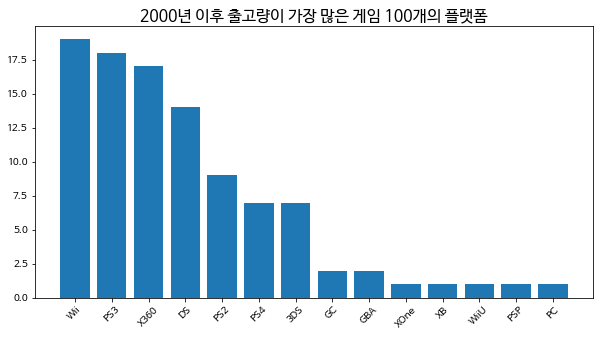

In [ ]:
# 시각화

plt.figure(figsize=(10,5));
plt.bar(df_test_4_year_platform.index,df_test_4_year_platform);
plt.title("2000년 이후 출고량이 가장 많은 게임 100개의 플랫폼", fontsize=16)
plt.xticks(rotation=45);

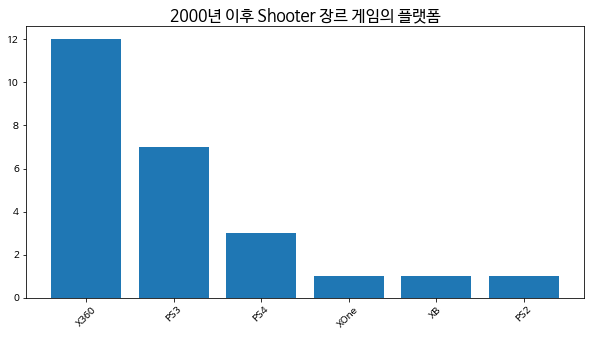

In [ ]:
genre_condition_2 = df_test_4_year['Genre'] == 'Shooter'

df_test_4_genre_action = df_test_4_year[genre_condition_2]
df_test_4_genre_action_platform = df_test_4_genre_action.groupby(df_test_4_genre_action['Platform']).size().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(df_test_4_genre_action_platform.index,df_test_4_genre_action_platform);
plt.title("2000년 이후 Shooter 장르 게임의 플랫폼", fontsize=16)
plt.xticks(rotation=45);

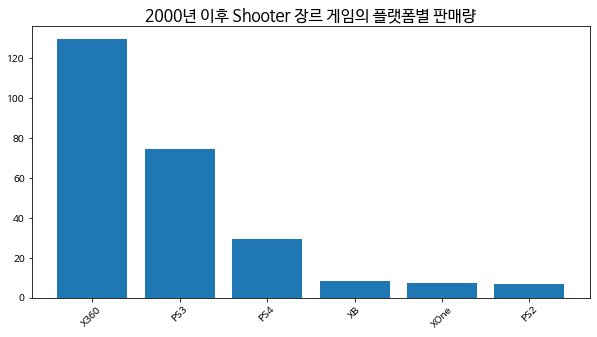

In [ ]:
genre_condition_2 = df_test_4_year['Genre'] == 'Shooter'

df_test_4_genre_action = df_test_4_year[genre_condition_2]
df_test_4_genre_action_platform = df_test_4_genre_action['Sum_of_Sales'].groupby(df_test_4_genre_action['Platform']).sum().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(df_test_4_genre_action_platform.index,df_test_4_genre_action_platform);
plt.title("2000년 이후 Shooter 장르 게임의 플랫폼별 판매량", fontsize=16)
plt.xticks(rotation=45);

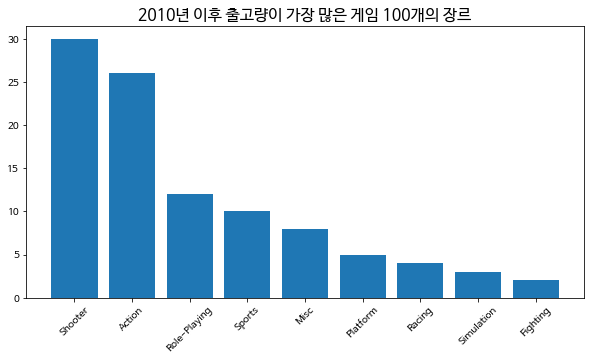

In [ ]:
year_condition_2 = df_test_4['Year'] > 2010

df_test_4_year = df_test_4[year_condition_2].head(100)

df_test_4_year_genre = df_test_4_year.groupby(df_test_4_year['Genre']).size().sort_values(ascending=False)
df_test_4_year_platform = df_test_4_year.groupby(df_test_4_year['Platform']).size().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(df_test_4_year_genre.index,df_test_4_year_genre);
plt.title("2010년 이후 출고량이 가장 많은 게임 100개의 장르", fontsize=16);
plt.xticks(rotation=45);

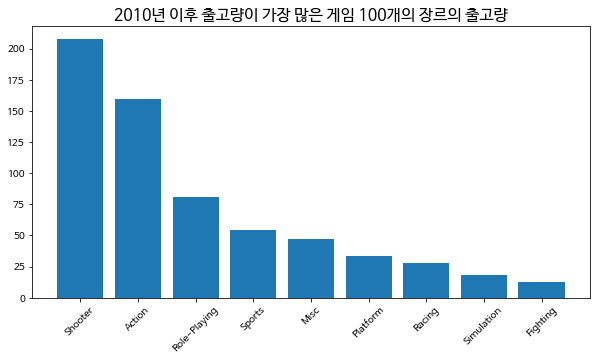

In [ ]:
sum_2 = df_test_4_year['Sum_of_Sales'].groupby(df_test_4_year['Genre']).sum().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(sum_2.index,sum_2);
plt.title("2010년 이후 출고량이 가장 많은 게임 100개의 장르의 출고량", fontsize=16);
plt.xticks(rotation=45);

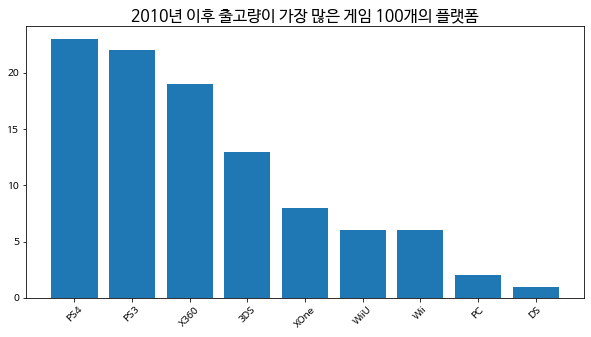

In [ ]:
# 시각화

plt.figure(figsize=(10,5));
plt.bar(df_test_4_year_platform.index,df_test_4_year_platform);
plt.title("2010년 이후 출고량이 가장 많은 게임 100개의 플랫폼", fontsize=16)
plt.xticks(rotation=45);

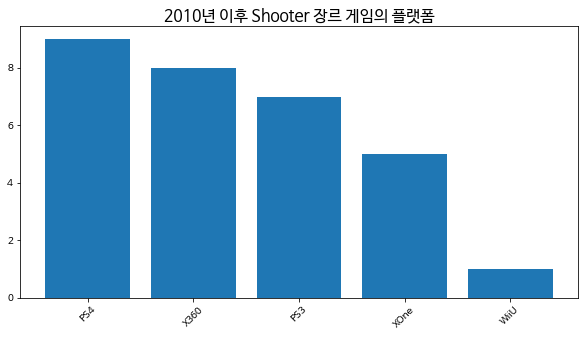

In [ ]:
genre_condition_2 = df_test_4_year['Genre'] == 'Shooter'

df_test_4_genre_action = df_test_4_year[genre_condition_2]
df_test_4_genre_action_platform = df_test_4_genre_action.groupby(df_test_4_genre_action['Platform']).size().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(df_test_4_genre_action_platform.index,df_test_4_genre_action_platform);
plt.title("2010년 이후 Shooter 장르 게임의 플랫폼", fontsize=16)
plt.xticks(rotation=45);

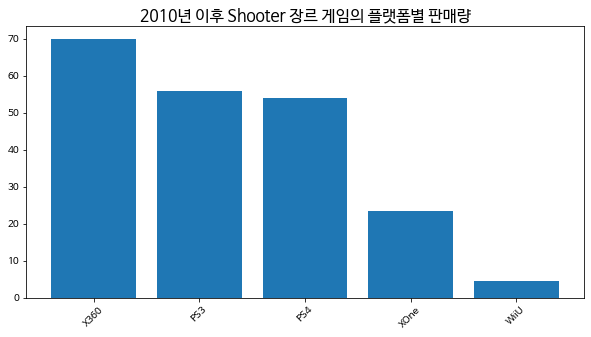

In [ ]:
genre_condition_2 = df_test_4_year['Genre'] == 'Shooter'

df_test_4_genre_action = df_test_4_year[genre_condition_2]
df_test_4_genre_action_platform = df_test_4_genre_action['Sum_of_Sales'].groupby(df_test_4_genre_action['Platform']).sum().sort_values(ascending=False)

plt.figure(figsize=(10,5));
plt.bar(df_test_4_genre_action_platform.index,df_test_4_genre_action_platform);
plt.title("2010년 이후 Shooter 장르 게임의 플랫폼별 판매량", fontsize=16)
plt.xticks(rotation=45);

# 즉, 다음분기에 출시해야하는 게임은 PS4 플랫폼 기반의 Shooter 장르 게임이다.
 - 지역별 게임 장르 선호도에서 일본지역을 제외하고 Shooter 게임의 선호도가 세번째로 높았다.
 - 연도별 게임 선호도에서도 Shooter 게임이 꾸준한 비중을 차지하고 있다. (데이터의 Limitation 존재)
 - 누적 판매량 기준 가장 많이 팔린 게임 100개 중 Shooter 게임의 비중이 가장 높았다. (전체 연도기준, 2000년도 이후 기준, 2010년도 이후 기준 전부)

   + 2010 년 이후 PS4 기반의 게임의 판매량이 급증하였다.